# Linear Regression

#### This notebook explores applying gradient descent to a linear regression model

## Linear Regression with Vectorised Gradient Descent

First let's do some housekeeping, importing the data and appropriate modules.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.genfromtxt('data/ex1data1.txt', delimiter=',')
x = data[:,0]
y = data[:,1]

Now we will plot the data, to see what it looks like

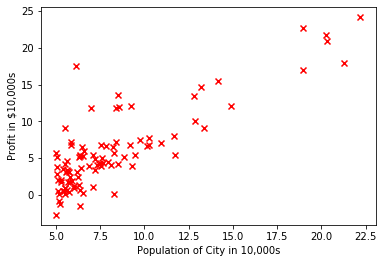

In [104]:
plt.scatter(x, y, marker='x', color='red')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

**Implementing Gradient Descent**

Here we fit linear regression using a batched gradient descent algorithm.

First let's get our variables setup

In [105]:
# First add a column of 1s to our features matrix
X = np.matrix([np.ones(len(y)),x])
X = X.transpose()
# convert x & y into matrix not vector...
y = np.matrix(y)
y = y.transpose()
x = np.matrix(x)
x = x.transpose()

Now let's define functions for gradient descent.

In [106]:
def computeCost(X, y, theta):
    m = len(y)
    # Get hypothesis
    h = X*theta

    # calculate sum of squares difference
    diff = np.sum(np.square(h - y))

    # multiply by m factor
    cost = (1/(2*m)) * diff

    return cost

In [107]:
def iterateTheta(X, y, theta, alpha):
    m = len(y)
    
    # Get hypothesis
    h = X*theta
    
    # X.T is transpose of X
    theta = theta - ((1 / m) * alpha * (X.T*(h-y)))

    return theta

In [108]:
# Now we can run through the iterations
def gradientDescent(X, y, alpha, n):
    # Initialize variables
    theta = np.zeros((2,1))
    theta_vals = [theta]
    J_vals = np.empty(n+1)
    J_vals[0] = computeCost(X, y, theta)

    for i in range(1,n+1):
        theta = iterateTheta(X, y, theta, alpha)
        J_vals[i] = computeCost(X, y, theta)
        theta_vals.append(theta)

    return J_vals, theta_vals

Let's do a trial run

In [109]:
n = 100
alpha = 0.001
J_vals, theta_vals = gradientDescent(X, y, alpha, n)


And plot what it looks like

In [111]:
def plotCostFunction(J_vals):
    plt.plot(np.arange(len(J_vals)), J_vals)
    plt.show()

def plotBestFit(theta, x, y):
    # Plot scatter plot with line of best fit defined by theta
    c = np.squeeze(np.asarray(theta[0]))
    m = np.squeeze(np.asarray(theta[1]))
    y_0 = c
    x_0 = 0

    x_1 = np.amax(x)
    y_1 = m*x_1 + c

    # turn matrices into 1d array
    y = np.squeeze(np.asarray(y))
    x = np.squeeze(np.asarray(x))

    plt.scatter(x, y, marker='x', color='red')
    plt.plot([x_0, x_1], [y_0, y_1], color='blue') 
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    plt.show()

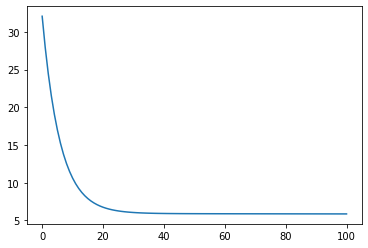

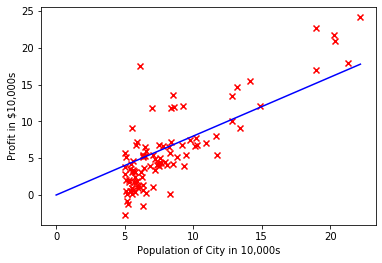

In [112]:
plotCostFunction(J_vals)
min_J = np.amin(J_vals)
result = np.where(J_vals == np.amin(J_vals))

plotBestFit(theta_vals[result[0][0]], x, y)

Great!

## Feature Normalization

Now let's expand our model, using more features and **feature normalization**

## Normal Equation

Instead of using **Gradient Descent**, we can use the **Normal Equation** to find the best fit.